## MLII HW4   Ellen Lull

I decided to try pytorch for this.  This was created and run in Google Colab.   

For the accuracy of the first CNN model, I have 80-85 percent, which is decent, but could be improved.     Handwriting issues seem to be the biggest issue, with some messier letters done later that ended up on the test set.  However, this is probably a realistic issue so I didn't change it

The first part of this Google COLAB is the CNN model using Pytorch to train on some handwritten letters A-E (50 each) and test on another 20 handwritten letters A-E (20 each).

After this completed, I switched out the last layer of the model and loaded data for letters 'F', 'G' and 'H'.    I ran the model again.  My accuracy was not as high, however.


In [1]:
import os
from PIL import Image
from IPython.display import display #this displays images in the notebook

# Filter harmless warnings
import warnings

In [2]:
#https://drive.google.com/file/d/1lK4KbVdtHV_0JSQyhM333t0RGn6jIlzT/view?usp=sharing
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

# id of file you want to access

unknown = {'id': '1lK4KbVdtHV_0JSQyhM333t0RGn6jIlzT'}
from google.colab import drive
drive.mount('/content/drive')
 

Mounted at /content/drive


In [3]:
#Creating a list of image filenames
path = "/content/drive/My Drive/MLIIProject4/train"
img_names = []  #creating a empty list

for folder, subfolder,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [4]:
img_names

['/content/drive/My Drive/MLIIProject4/train/Aletters/A2.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A3.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/259.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A5.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A6.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A7.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A8.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A9.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A10.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A11.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A17.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A18.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A19.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A21.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Aletters/A22.jpg',
 '/content/drive/My Drive/MLIIProject4/train/Al

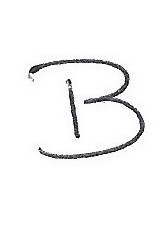

In [5]:
# Image opened using Pillow Image
with Image.open('/content/drive/My Drive/MLIIProject4/train/Bletters/B12.jpg') as im:
    display(im)

In [6]:
#total of image names
len(img_names)

250

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
#We need to define the models

train_transform = transforms.Compose([
        transforms.Resize(28),              
        transforms.CenterCrop(28),          
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize([.5,],[.5,])
    ])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.CenterCrop(28),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
       transforms.Normalize([.5,],[.5,])
    ])

In [9]:
train_transform

Compose(
    Resize(size=28, interpolation=bilinear)
    CenterCrop(size=(28, 28))
    Grayscale(num_output_channels=1)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)

In [10]:
root = '/content/drive/My Drive/MLIIProject4'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform) #call imagefolder off of datasets
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['Aletters', 'Bletters', 'Cletters', 'Dletters', 'Eletters']
Training images available: 250
Testing images available:  100


In [11]:
for images,labels in train_loader: 

    print(labels)
   

tensor([0, 2, 0, 4, 1, 3, 1, 4, 1, 4])
tensor([4, 2, 1, 2, 3, 4, 2, 2, 2, 0])
tensor([0, 2, 1, 3, 3, 0, 4, 0, 1, 0])
tensor([4, 2, 3, 3, 3, 2, 2, 0, 1, 2])
tensor([0, 3, 1, 2, 2, 4, 1, 1, 4, 2])
tensor([2, 3, 0, 0, 0, 2, 3, 1, 1, 3])
tensor([2, 1, 3, 0, 3, 2, 3, 3, 3, 0])
tensor([3, 0, 1, 4, 3, 1, 3, 0, 1, 2])
tensor([2, 3, 1, 2, 1, 1, 1, 4, 4, 4])
tensor([3, 4, 0, 1, 4, 0, 3, 1, 2, 0])
tensor([3, 1, 4, 0, 4, 2, 2, 4, 2, 3])
tensor([3, 1, 4, 0, 3, 3, 1, 4, 1, 3])
tensor([4, 0, 0, 4, 3, 0, 1, 2, 0, 0])
tensor([2, 0, 0, 4, 1, 0, 4, 4, 1, 3])
tensor([1, 3, 2, 2, 3, 0, 4, 4, 0, 0])
tensor([3, 4, 3, 2, 2, 0, 4, 1, 0, 2])
tensor([4, 0, 2, 3, 0, 0, 2, 2, 1, 2])
tensor([3, 3, 4, 4, 3, 1, 4, 3, 2, 1])
tensor([0, 2, 2, 4, 4, 4, 0, 1, 0, 1])
tensor([3, 1, 3, 4, 0, 2, 0, 1, 4, 1])
tensor([0, 4, 0, 1, 2, 2, 3, 1, 2, 1])
tensor([4, 4, 1, 3, 1, 4, 0, 4, 4, 4])
tensor([3, 2, 3, 3, 4, 4, 1, 1, 0, 2])
tensor([4, 4, 3, 1, 3, 1, 1, 0, 3, 2])
tensor([4, 0, 2, 2, 0, 2, 0, 2, 1, 3])


Label: [4 0 2 2 0 2 0 2 1 3]
Class: Eletters Aletters Cletters Cletters Aletters Cletters Aletters Cletters Bletters Dletters


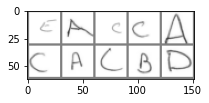

In [12]:
# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-1],
    std=[2]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(3,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

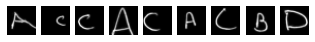

In [13]:
figure = plt.figure()
num_of_images = 9
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [14]:
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [15]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        
        # Convolution 1    Tried 16 and 32.  Didn't change much
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2  Tried 16 and 32 and 32 and 64.  Didn't change much
        self.cnn2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Define dropout - tried .05 - .25
        self.dropout = nn.Dropout(0.05)
        
        # Fully connected 1
        self.fc1 = nn.Linear(64 * 5 * 5, 10) 
    
    def forward(self, x):
        # Set 1
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        
        # Set 2
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        
        #Flatten
        out = out.view(out.size(0), -1)

        #Dense
        out = self.fc1(out)
        
        return out

#Definition of hyperparameters
n_iters = 2500
num_epochs = n_iters / (len(train_loader) / 10)
num_epochs = int(num_epochs)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
torch.manual_seed(10) #setting the seed
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)  #adam optimizer 
CNNmodel

ConvolutionalNetwork(
  (cnn1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.05, inplace=False)
  (fc1): Linear(in_features=1600, out_features=10, bias=True)
)

In [17]:
#Train the model and run test dataset through

import time
start_time = time.time()

# tried 20 - 400 epochs   Didn't seem to help over 20

epochs = 50

train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):  #this keep track of how many we got correct during training
    trn_corr = 0  #training set
    tst_corr = 0  #test set
    
# Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):   
            
        b+=1
        
        #predicted image
        # Apply the model
       
        y_pred = CNNmodel(X_train)  
        #print(y_pred,y_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
         # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        #We can get a print out for every 20 batches
          # Print interim results
       # if b%20 == 0:
       #   print(f'Epoch: {i} LOSS:  {loss.item()}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # TEST SET
    # Run the testing batches
    correct = 0
    total = 0
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
                            
                # Apply the model
                # PASS in predicted value
            y_val = CNNmodel(X_test)
                        
                # See if we predicted correctly
                 # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            batch_corr = (predicted==y_test).sum()
            tst_corr = tst_corr + batch_corr
               # Total number of labels
 
            total=len(y_test)
                    
            accuracy = 100 * batch_corr / float(total)
            if b%20 == 0:
               print(f'Epoch: {i} ACCURACY:  {accuracy}')
 
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
            
    
total_time = time.time() - start_time
print(f'Total Time: {total_time/60} minutes')

Epoch: 0 ACCURACY:  50.0
Epoch: 1 ACCURACY:  50.0
Epoch: 2 ACCURACY:  60.0
Epoch: 3 ACCURACY:  60.0
Epoch: 4 ACCURACY:  70.0
Epoch: 5 ACCURACY:  70.0
Epoch: 6 ACCURACY:  70.0
Epoch: 7 ACCURACY:  60.0
Epoch: 8 ACCURACY:  60.0
Epoch: 9 ACCURACY:  70.0
Epoch: 10 ACCURACY:  50.0
Epoch: 11 ACCURACY:  80.0
Epoch: 12 ACCURACY:  40.0
Epoch: 13 ACCURACY:  60.0
Epoch: 14 ACCURACY:  50.0
Epoch: 15 ACCURACY:  60.0
Epoch: 16 ACCURACY:  90.0
Epoch: 17 ACCURACY:  80.0
Epoch: 18 ACCURACY:  50.0
Epoch: 19 ACCURACY:  90.0
Epoch: 20 ACCURACY:  80.0
Epoch: 21 ACCURACY:  80.0
Epoch: 22 ACCURACY:  90.0
Epoch: 23 ACCURACY:  80.0
Epoch: 24 ACCURACY:  70.0
Epoch: 25 ACCURACY:  90.0
Epoch: 26 ACCURACY:  80.0
Epoch: 27 ACCURACY:  70.0
Epoch: 28 ACCURACY:  70.0
Epoch: 29 ACCURACY:  60.0
Epoch: 30 ACCURACY:  80.0
Epoch: 31 ACCURACY:  80.0
Epoch: 32 ACCURACY:  50.0
Epoch: 33 ACCURACY:  60.0
Epoch: 34 ACCURACY:  70.0
Epoch: 35 ACCURACY:  70.0
Epoch: 36 ACCURACY:  80.0
Epoch: 37 ACCURACY:  80.0
Epoch: 38 ACCURACY:  6

In [18]:
# To see how many we got correct
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/100:.2f}%')

[tensor(20), tensor(32), tensor(52), tensor(45), tensor(58), tensor(55), tensor(56), tensor(59), tensor(64), tensor(69), tensor(62), tensor(69), tensor(66), tensor(70), tensor(71), tensor(73), tensor(76), tensor(70), tensor(72), tensor(72), tensor(76), tensor(78), tensor(76), tensor(72), tensor(78), tensor(79), tensor(78), tensor(74), tensor(77), tensor(75), tensor(76), tensor(79), tensor(73), tensor(78), tensor(74), tensor(76), tensor(80), tensor(81), tensor(80), tensor(79), tensor(77), tensor(81), tensor(80), tensor(74), tensor(81), tensor(78), tensor(80), tensor(81), tensor(80), tensor(81)]
Test accuracy: 81.00%


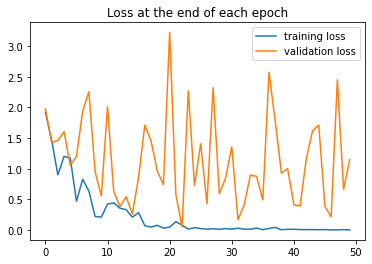

In [19]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

This is kind of a clumsy thing, but I wanted to see the letters and then below see the labels.   More time can be spent to clean this up

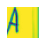

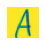

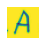

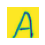

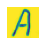

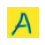

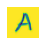

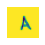

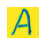

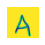

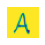

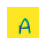

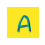

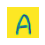

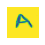

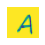

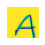

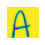

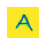

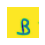

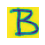

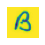

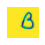

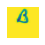

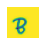

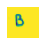

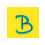

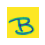

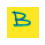

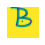

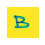

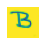

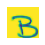

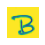

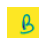

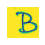

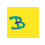

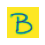

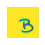

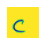

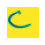

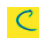

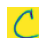

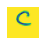

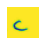

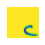

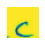

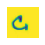

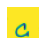

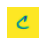

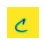

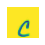

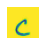

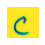

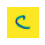

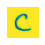

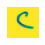

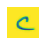

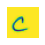

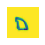

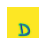

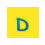

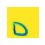

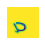

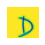

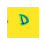

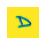

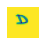

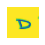

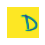

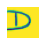

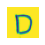

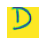

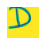

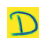

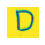

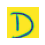

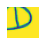

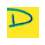

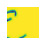

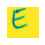

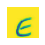

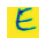

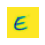

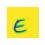

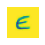

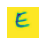

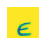

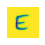

In [20]:
for image_index in range(1,90): #choosing a image number

  # Inverse normalize the image
  im=test_data[image_index][0]
  inv_normalize = transforms.Normalize(
     mean=[-1],
     std=[2]
  )
  im_inv = inv_normalize(im)
  # Print the image
  plt.figure(figsize=(12,4))
  plt.subplot(6, 10, index)
  plt.axis('off')
  plt.imshow(im.numpy().squeeze())

In [21]:
# CNN Model Prediction:
# Below our model predicted incorrectly
CNNmodel.eval()
for x in range(1,90):
  with torch.no_grad():
      new_pred = CNNmodel(test_data[x][0].view(1,1,28,28)).argmax()  #1 image, 1 color channels, 28x28 pixels
  print(new_pred.item(),class_names[new_pred.item()])

2 Cletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
3 Dletters
0 Aletters
0 Aletters
3 Dletters
0 Aletters
0 Aletters
0 Aletters
0 Aletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
3 Dletters
3 Dletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
1 Bletters
3 Dletters
1 Bletters
3 Dletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
3 Dletters
0 Aletters
1 Bletters
0 Aletters
2 Cletters
2 Cletters
3 Dletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
2 Cletters
3 Dletters
3 Dletters
3 Dletters
2 Cletters
3 Dletters
3 Dletters
1 Bletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
3 Dletters
2 Cletters
4 Eletters
1 Bletters
4 Eletters
4 Eletters
4 Eletters
2 Cletters
4 Eletters
4 Eletters


This is my attempt at the transfer learning section.  I'm going to replace the last layer, the "fc" layer with new parameters to allow for letters "F" "G" "H"
Then I will load the new training and test data and run the model

I think I was supposed to be able to use less training data, so I probably will need to re-do some of this, but for now, at least its working a bit.

In [55]:
CNNmodel.named_modules
#Dense and fully connected are two names for the same thing.

<bound method Module.named_modules of ConvolutionalNetwork(
  (cnn1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.05, inplace=False)
  (fc1): Linear(in_features=1600, out_features=10, bias=True)
)>

In [56]:
root = '/content/drive/My Drive/MLIIProject4'

train_data = datasets.ImageFolder(os.path.join(root, 'TLtrain'), transform=train_transform) #call imagefolder off of datasets
test_data = datasets.ImageFolder(os.path.join(root, 'TLtest'), transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['Fletters', 'Gletters', 'Hletters']
Training images available: 150
Testing images available:  60


Label: [2 1 2 1 1 0 2 1 1 1]
Class: Hletters Gletters Hletters Gletters Gletters Fletters Hletters Gletters Gletters Gletters


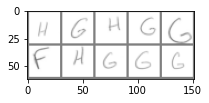

In [57]:
# Print the labels
for images,labels in train_loader: 
  break

print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-1],
    std=[2]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(3,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [58]:
#Create a new output layer

CNNmodel.fc1 = nn.Linear(64 * 3 *3, 10)

torch.manual_seed(10) #setting the seed
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)  #adam optimizer 
CNNmodel

ConvolutionalNetwork(
  (cnn1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.05, inplace=False)
  (fc1): Linear(in_features=1600, out_features=10, bias=True)
)

In [59]:
# Fit the model and check validation data
import time
start_time = time.time()

# tried 20 - 400 epochs   Didn't seem to help over 20

epochs = 50

train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):  #this keep track of how many we got correct during training
    trn_corr = 0  #training set
    tst_corr = 0  #test set
    
# Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):   
            
        b+=1
        
        #predicted image
        # Apply the model
       
        y_pred = CNNmodel(X_train)  
        #print(y_pred,y_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
         # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        #We can get a print out for every 20 batches
          # Print interim results
       # if b%20 == 0:
       #   print(f'Epoch: {i} LOSS:  {loss.item()}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # TEST SET
    # Run the testing batches
    correct = 0
    total = 0
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
                            
                # Apply the model
                # PASS in predicted value
            y_val = CNNmodel(X_test)
                        
                # See if we predicted correctly
                 # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            batch_corr = (predicted==y_test).sum()
            tst_corr = tst_corr + batch_corr
               # Total number of labels
 
            total=len(y_test)
                    
            accuracy = 100 * batch_corr / float(total)
            if b%20 == 0:
               print(f'Epoch: {i} ACCURACY:  {accuracy}')
 
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
            
    
total_time = time.time() - start_time
print(f'Total Time: {total_time/60} minutes')

Epoch: 0 ACCURACY:  40.0
Epoch: 1 ACCURACY:  20.0
Epoch: 2 ACCURACY:  40.0
Epoch: 3 ACCURACY:  20.0
Epoch: 4 ACCURACY:  50.0
Epoch: 5 ACCURACY:  50.0
Epoch: 6 ACCURACY:  70.0
Epoch: 7 ACCURACY:  50.0
Epoch: 8 ACCURACY:  70.0
Epoch: 9 ACCURACY:  90.0
Epoch: 10 ACCURACY:  80.0
Epoch: 11 ACCURACY:  60.0
Epoch: 12 ACCURACY:  90.0
Epoch: 13 ACCURACY:  80.0
Epoch: 14 ACCURACY:  100.0
Epoch: 15 ACCURACY:  70.0
Epoch: 16 ACCURACY:  80.0
Epoch: 17 ACCURACY:  100.0
Epoch: 18 ACCURACY:  90.0
Epoch: 19 ACCURACY:  100.0
Epoch: 20 ACCURACY:  90.0
Epoch: 21 ACCURACY:  90.0
Epoch: 22 ACCURACY:  100.0
Epoch: 23 ACCURACY:  90.0
Epoch: 24 ACCURACY:  90.0
Epoch: 25 ACCURACY:  100.0
Epoch: 26 ACCURACY:  80.0
Epoch: 27 ACCURACY:  100.0
Epoch: 28 ACCURACY:  100.0
Epoch: 29 ACCURACY:  90.0
Epoch: 30 ACCURACY:  90.0
Epoch: 31 ACCURACY:  100.0
Epoch: 32 ACCURACY:  90.0
Epoch: 33 ACCURACY:  100.0
Epoch: 34 ACCURACY:  90.0
Epoch: 35 ACCURACY:  100.0
Epoch: 36 ACCURACY:  90.0
Epoch: 37 ACCURACY:  90.0
Epoch: 38 AC

In [63]:
# To see how many we got correct
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*60/60:.2f}%')

[tensor(20), tensor(20), tensor(25), tensor(21), tensor(40), tensor(45), tensor(37), tensor(46), tensor(44), tensor(47), tensor(48), tensor(48), tensor(49), tensor(51), tensor(51), tensor(52), tensor(53), tensor(54), tensor(53), tensor(53), tensor(53), tensor(53), tensor(55), tensor(54), tensor(54), tensor(54), tensor(54), tensor(54), tensor(55), tensor(55), tensor(55), tensor(55), tensor(55), tensor(55), tensor(55), tensor(56), tensor(55), tensor(56), tensor(56), tensor(55), tensor(55), tensor(55), tensor(56), tensor(55), tensor(55), tensor(55), tensor(55), tensor(55), tensor(55), tensor(55)]
Test accuracy: 55.00%


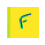

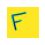

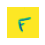

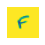

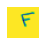

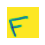

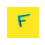

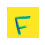

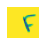

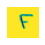

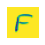

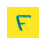

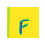

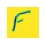

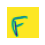

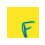

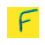

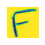

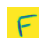

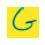

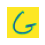

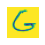

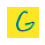

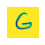

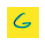

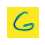

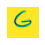

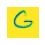

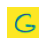

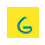

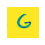

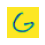

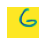

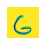

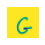

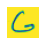

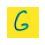

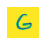

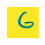

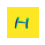

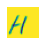

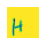

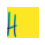

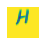

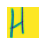

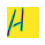

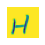

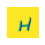

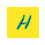

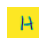

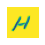

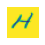

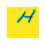

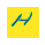

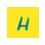

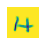

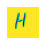

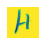

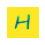

In [61]:
for image_index in range(1,60): #choosing a image number

  # Inverse normalize the image
  im=test_data[image_index][0]
  inv_normalize = transforms.Normalize(
     mean=[-1],
     std=[2]
  )
  im_inv = inv_normalize(im)
  # Print the image
  plt.figure(figsize=(12,4))
  plt.subplot(6, 10, index)
  plt.axis('off')
  plt.imshow(im.numpy().squeeze())

In [62]:
# CNN Model Prediction:
# Below our model predicted incorrectly
CNNmodel.eval()
for x in range(1,60):
  with torch.no_grad():
      new_pred = CNNmodel(test_data[x][0].view(1,1,28,28)).argmax()  #1 image, 1 color channels, 28x28 pixels
  print(new_pred.item(),class_names[new_pred.item()])

0 Fletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
2 Hletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
0 Fletters
2 Hletters
0 Fletters
0 Fletters
0 Fletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
1 Gletters
2 Hletters
2 Hletters
0 Fletters
0 Fletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
0 Fletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
2 Hletters
